## Importing data

In [34]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [35]:
original_accident_data = pd.read_csv('./data/Accident_Information.csv')
original_accident_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


## Preprocessing

In [36]:
original_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [37]:
original_accident_data.isnull().sum()

Accident_Index                                       0
1st_Road_Class                                       0
1st_Road_Number                                      2
2nd_Road_Class                                  844272
2nd_Road_Number                                  17593
Accident_Severity                                    0
Carriageway_Hazards                            2007807
Date                                                 0
Day_of_Week                                          0
Did_Police_Officer_Attend_Scene_of_Accident        278
Junction_Control                                     0
Junction_Detail                                      0
Latitude                                           174
Light_Conditions                                     0
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Longitude 

In [38]:
to_drop = ['Accident_Index','2nd_Road_Class', 'Carriageway_Hazards', 'LSOA_of_Accident_Location', 'InScotland']
needed_features_data = original_accident_data.drop(to_drop, axis=1)

In [39]:
fillna_cols = ['Did_Police_Officer_Attend_Scene_of_Accident', 'Special_Conditions_at_Site', 'Speed_limit']
needed_features_data[fillna_cols] = needed_features_data[fillna_cols].fillna(0)

police_attend_replace_dict = {1: 0, 2: 1, 3: 1}
needed_features_data['Did_Police_Officer_Attend_Scene_of_Accident'] = needed_features_data['Did_Police_Officer_Attend_Scene_of_Accident'].replace(police_attend_replace_dict)

In [40]:
# for the remaining NA, will simply drop them
accident = needed_features_data.dropna()
print(f"the number of null values: {accident.isnull().sum().sum()}")

the number of null values: 0


In [41]:
# data_to_process = len(accident) // 100
# data_to_process

accident = accident.sample(frac=0.01, random_state=0)

In [42]:
accident[['Latitude', 'Longitude']]

,Latitude,Longitude
1641304,51.515773,-0.100487
1257603,53.796448,-1.533891
473352,52.505901,-1.566225
266739,53.428884,-1.484343
1287139,53.219475,-0.430048
...,...,...
1813595,53.484222,-2.351366
1669421,53.666967,-2.634108
1765782,50.728897,-1.816524
1995366,52.500391,0.599019


In [43]:
accident[['Accident_Severity']]

,Accident_Severity
1641304,Slight
1257603,Slight
473352,Slight
266739,Slight
1287139,Slight
...,...
1813595,Slight
1669421,Slight
1765782,Slight
1995366,Serious


# data encoding

In [44]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].replace({'Urban': 1, 'Rural': 0})
accident['Accident_Severity'] = accident['Accident_Severity'].replace({'Slight': 0, 'Serious': 1, 'Fatal': 2})

In [45]:
from sklearn.preprocessing import LabelEncoder # we will use  this to encode our categorical variables 

# function to encode the columns of the dataFrame
def encode_columns(df, cols):
    for column in cols:
        label_encoder = LabelEncoder()

        df[column] = df[column].astype(str)
        df[column] = label_encoder.fit_transform(df[column])
    return df

# get all the categorical values to encode them
categorical_features = accident.select_dtypes(include=['object', 'category']).columns.tolist()

encoded_accident = encode_columns(accident, categorical_features)

# EDA

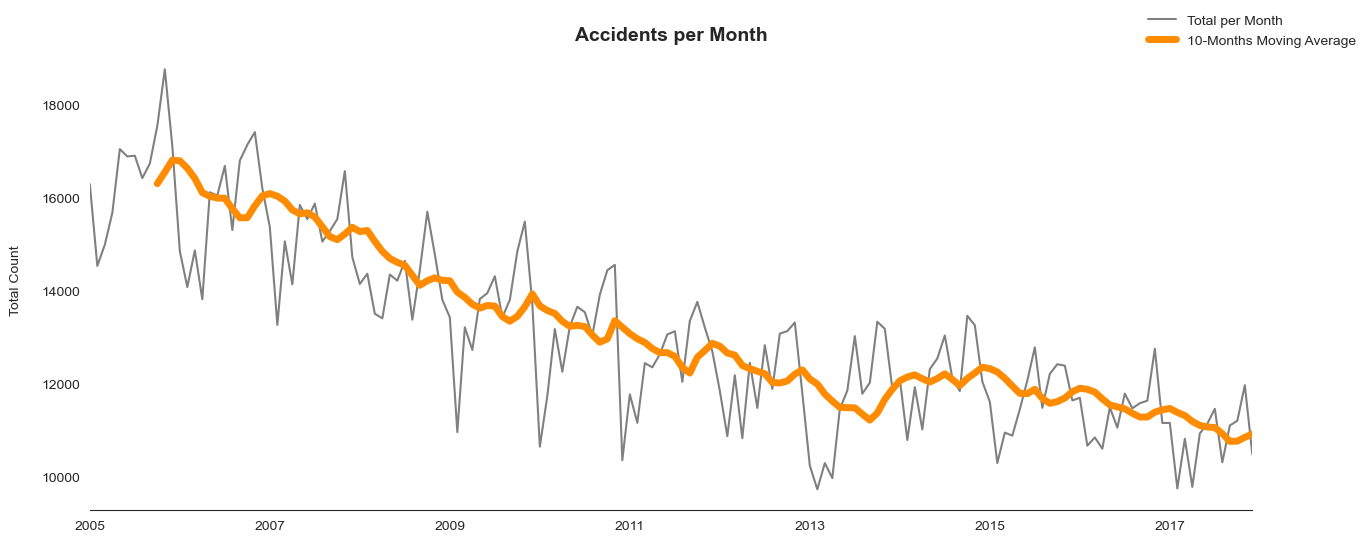

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
original_accident_data['Date']= pd.to_datetime(original_accident_data['Date'], format="%Y-%m-%d")

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
original_accident_data.set_index('Date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
original_accident_data.set_index('Date').resample('M').size().rolling(window=10).mean().plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

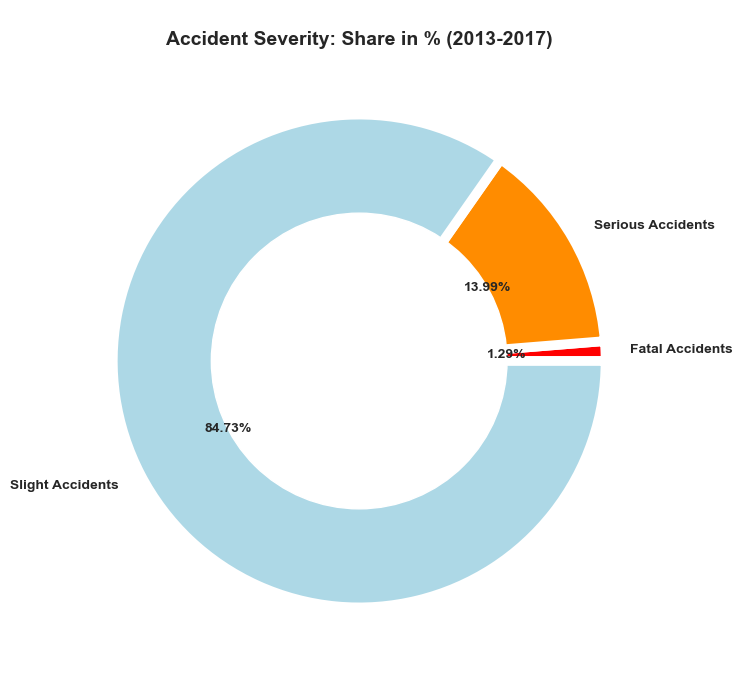

In [47]:
# assign the data
fatal   = original_accident_data.Accident_Severity.value_counts()['Fatal']
serious = original_accident_data.Accident_Severity.value_counts()['Serious']
slight  = original_accident_data.Accident_Severity.value_counts()['Slight']

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'lightblue'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (2013-2017)', fontsize=14, fontweight='bold')
plt.show()

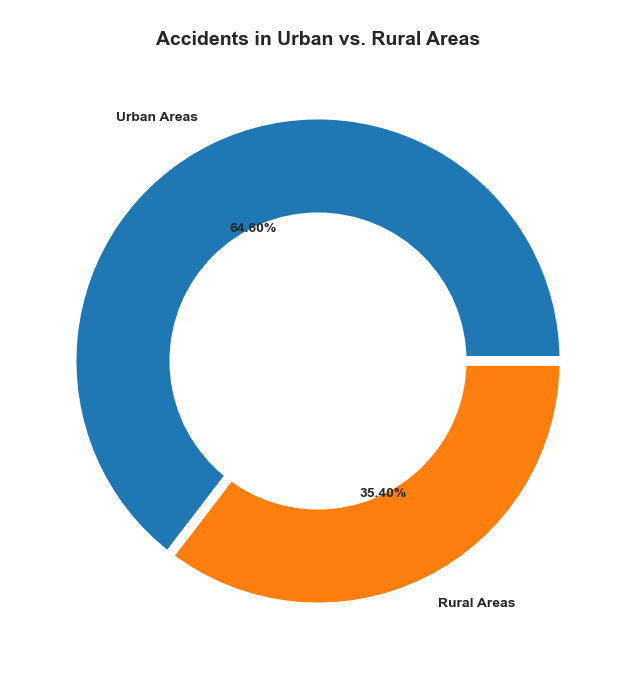

In [48]:
# assign the data
urban   = original_accident_data.Urban_or_Rural_Area.value_counts()['Urban']
rural = original_accident_data.Urban_or_Rural_Area.value_counts()['Rural']

names = ['Urban Areas','Rural Areas']
size  = [urban, rural]

# colors=['red', 'darkorange', 'blue'],
# create a pie chart
plt.pie(
    x=size,
    labels=names,
    autopct='%1.2f%%',
    pctdistance=0.6,
    textprops=dict(fontweight='bold'),
    wedgeprops={'linewidth':7, 'edgecolor':'white'}
)

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccidents in Urban vs. Rural Areas', fontsize=14, fontweight='bold')
plt.show()

<Axes: xlabel='Accident_Severity'>

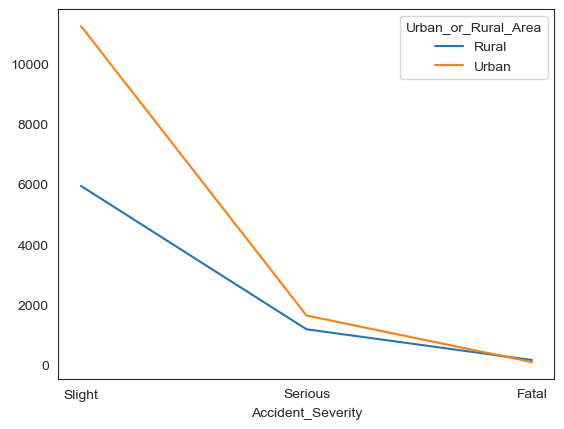

In [49]:
accident_ones_df = accident.copy()
accident_ones_df['ones'] = 1

area_severity_table = pd.pivot_table(
    data=accident_ones_df,
    values='ones',
    index='Accident_Severity',
    columns='Urban_or_Rural_Area',
    aggfunc='count'
)

area_severity_table.columns = ['Rural', 'Urban']
area_severity_table.columns.name = 'Urban_or_Rural_Area'
area_severity_table.index = ['Slight', 'Serious', 'Fatal']
area_severity_table.index.name = 'Accident_Severity'
area_severity_table.plot()

*We can note that Urban areas has more accidents that Rural areas, especially slight accidents*

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Daylight'),
  Text(1, 0, 'Darkness - lights lit'),
  Text(2, 0, 'Darkness - lighting unknown'),
  Text(3, 0, 'Darkness - lights unlit'),
  Text(4, 0, 'Darkness - no lighting'),
  Text(5, 0, 'Data missing or out of range')])

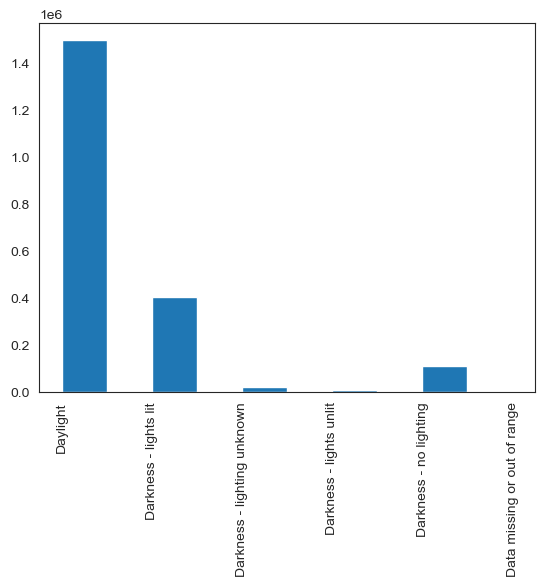

In [50]:
plt.hist(original_accident_data['Light_Conditions'])
plt.xticks(rotation=90)

In [51]:
weather_light_table = pd.pivot_table(
    data=accident_ones_df,
    values='ones',
    index='Weather_Conditions',
    columns='Light_Conditions',
    aggfunc='count',
    fill_value=0
)


light_values = original_accident_data['Light_Conditions'].unique()
light_values = [val for val in light_values if val != 'Data missing or out of range']
weather_light_table.columns = light_values
weather_light_table.columns.name = 'Light_Conditions'
weather_light_table.index = original_accident_data['Weather_Conditions'].unique()
weather_light_table.index.name = 'Weather_Conditions'
weather_light_table

Light_Conditions,Daylight,Darkness - lights lit,Darkness - lighting unknown,Darkness - lights unlit,Darkness - no lighting
Weather_Conditions,,,,,
Raining no high winds,0,0,0,0,1
Fine no high winds,3,48,2,28,172
Unknown,145,2880,68,811,12289
Snowing no high winds,3,31,0,28,48
Other,7,120,1,48,252
Fine + high winds,4,105,3,52,114
Raining + high winds,26,667,20,166,1536
Fog or mist,0,7,0,5,7
Snowing + high winds,0,37,0,18,68


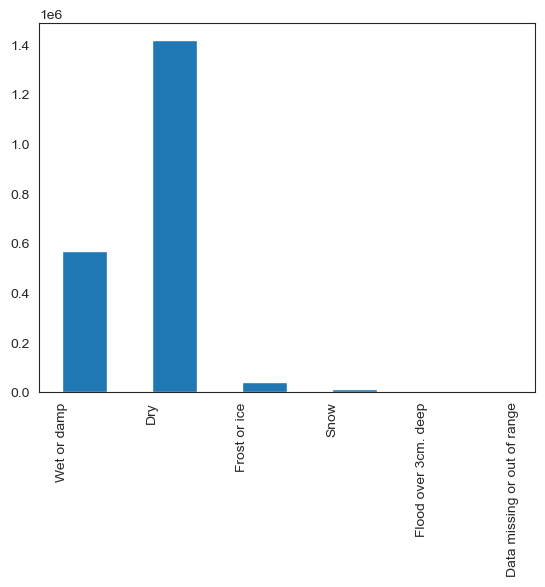

In [52]:
plt.hist(original_accident_data['Road_Surface_Conditions'])
plt.xticks(rotation=90)
plt.show()

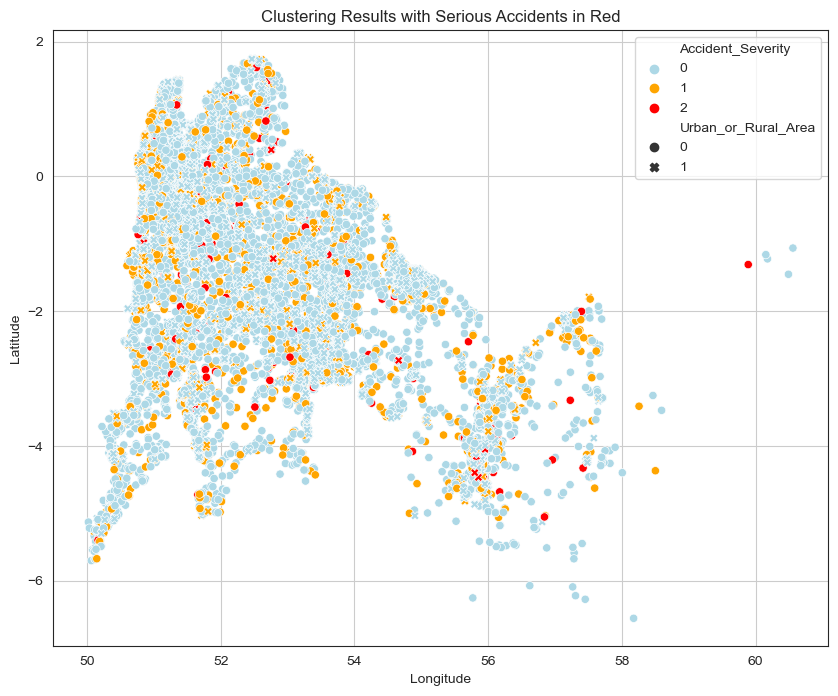

In [53]:
plt.figure(figsize=(10, 8))


color_map = {0:'lightblue', 1:'orange', 2:'red'}
accident['Color'] = accident['Urban_or_Rural_Area'].map(color_map)
sns.scatterplot(
    x='Latitude',
    y='Longitude',
    hue='Accident_Severity',
    data=accident,
    palette=color_map,
    legend='full',
    sizes={1: 0.5, 0: 0.1}, style='Urban_or_Rural_Area'
) 

plt.title('Clustering Results with Serious Accidents in Red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()

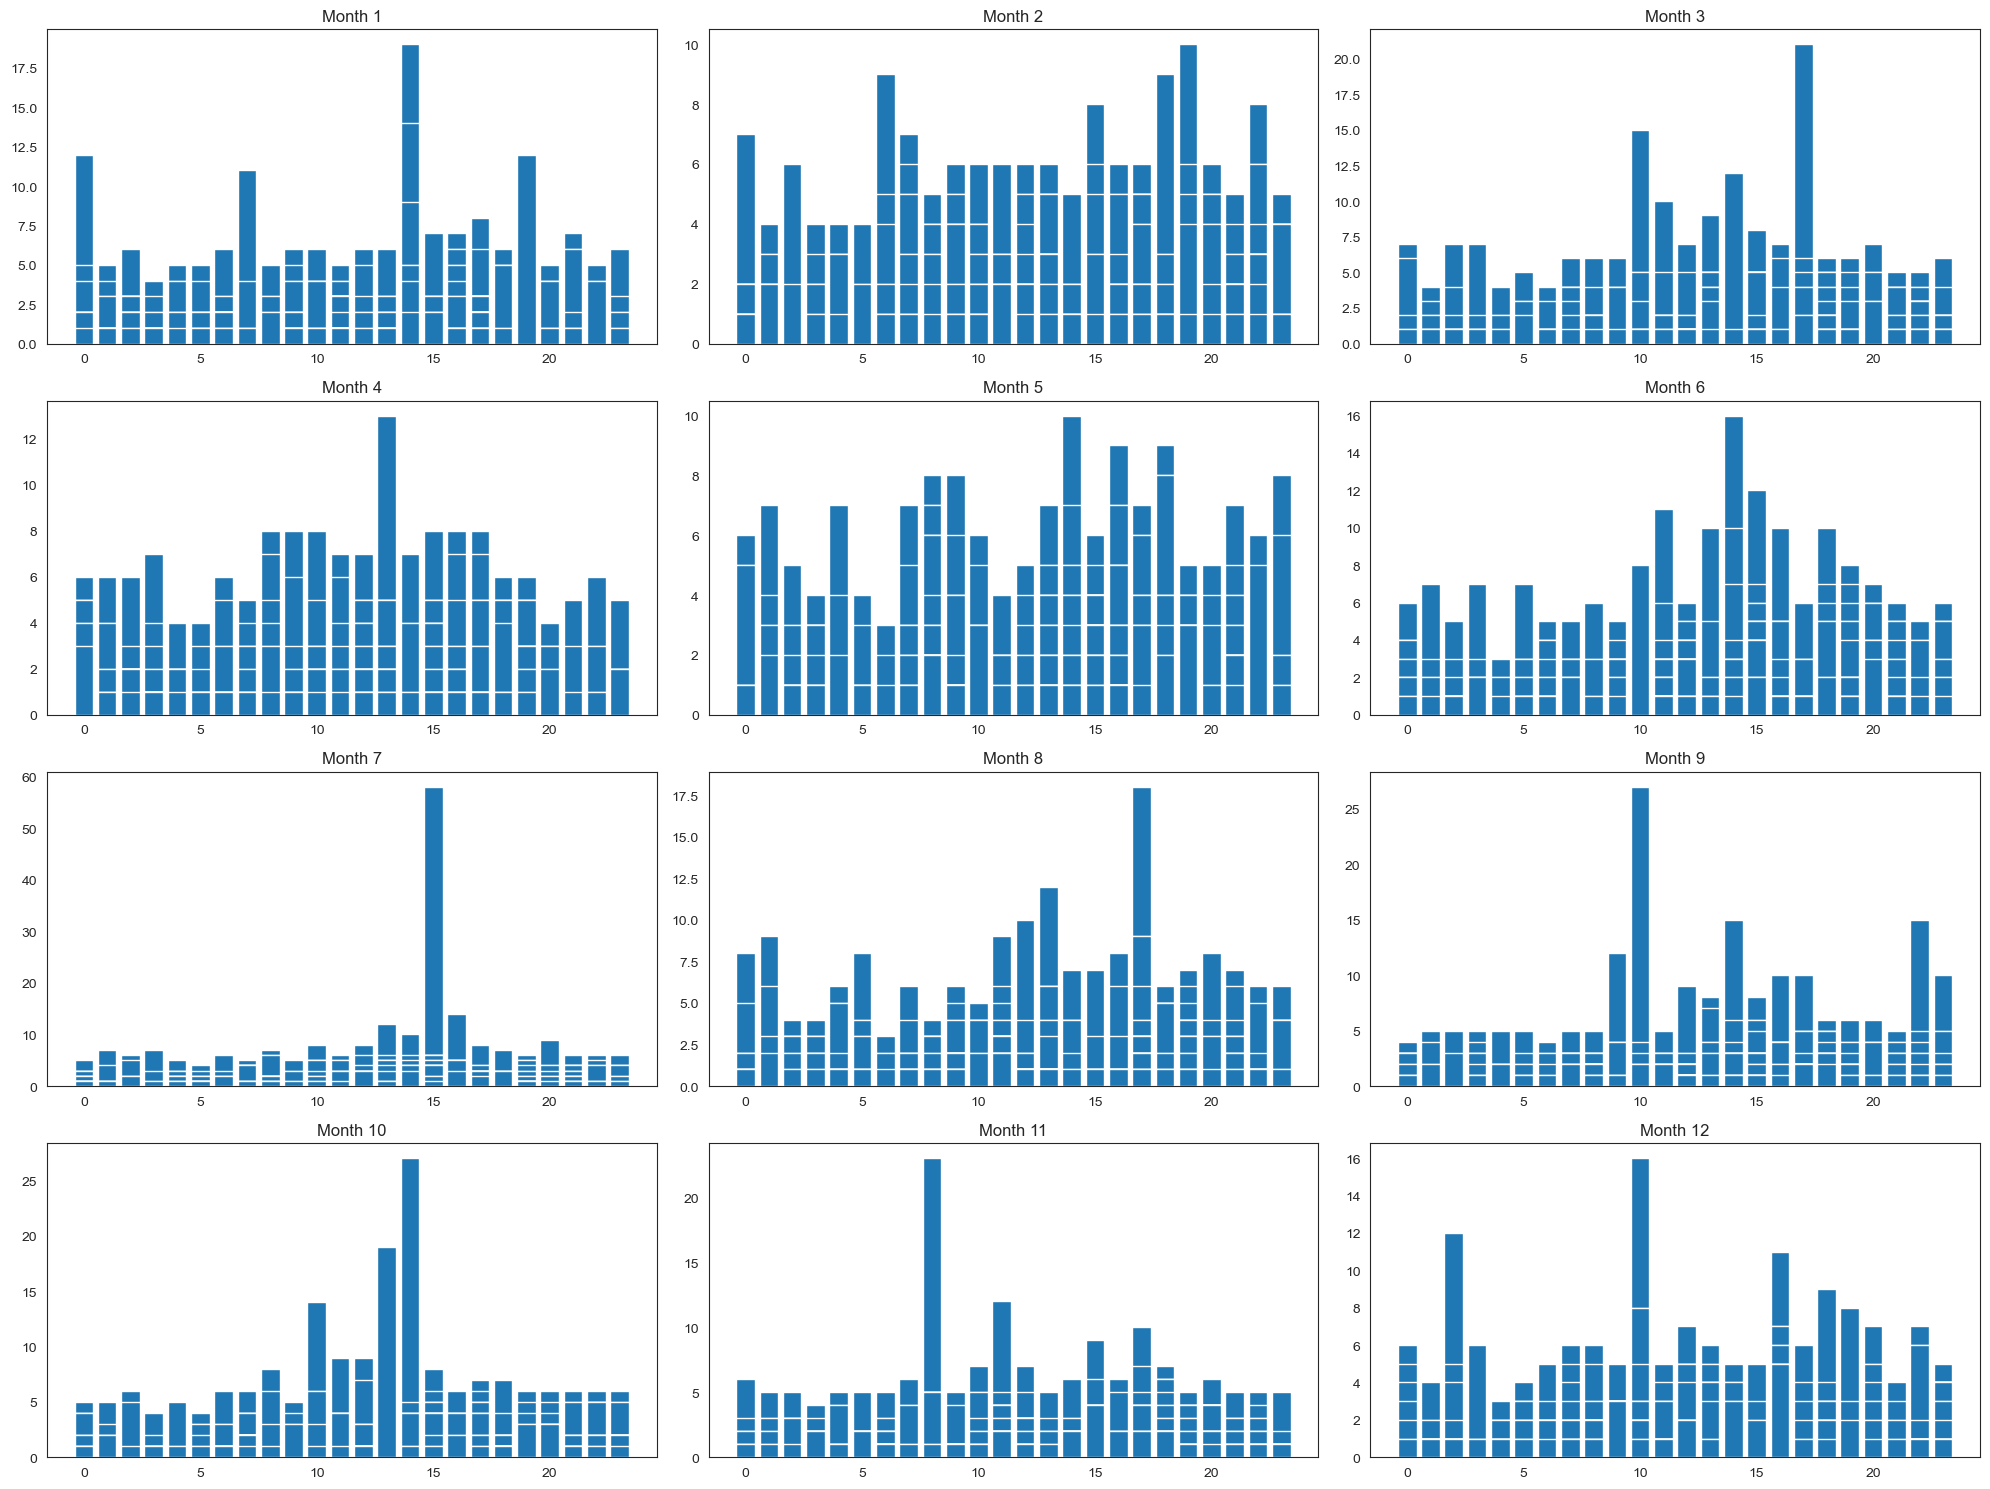

In [54]:
modified_accident_df = original_accident_data.copy()

modified_accident_df['Date'] = pd.to_datetime(original_accident_data['Date'])

# slice first and second string from time column
modified_accident_df['Hour'] = modified_accident_df['Time'].str[0:2]

# convert new column to numeric datetype
modified_accident_df['Hour'] = pd.to_numeric(modified_accident_df['Hour'])

# drop null values in our new column
modified_accident_df = modified_accident_df.dropna(subset=['Hour'])

# cast to integer values
modified_accident_df['Hour'] = modified_accident_df['Hour'].astype('int')

year = 2016
mask_by_month = {}

for month in range(1, 13):
    mask_current_month = (modified_accident_df['Date'].dt.month == month) & (modified_accident_df['Date'].dt.year == year)
    mask_by_month[month] = mask_current_month

rows = 4
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(rows * 5, cols * 5))  # Creating a grid of subplots

for i, ax in enumerate(axes.flatten(), start=1):
    masked_df = modified_accident_df[mask_by_month[i]]  # Accessing the correct mask for the current month
    ax.bar(masked_df['Hour'], masked_df['Number_of_Casualties'])
    ax.set_title(f"Month {i}")  # Setting title for each subplot

plt.tight_layout()
plt.show()

# genetic algorithm

we will use the genetic algorithm in feature selection <br>
genetic algorithm steps<br>
<li>
generate random population
</li>
<li>
calculate the fitness function
</li>
<li>
get the new generation
</li> <br>
for the fitness function we will use the logistic regression model<br>
for each chromosome we will build a model and calculate the accuracy according to the `Accident_Severity`

In [55]:
from geneticFeatureSelection import geneticFeatureSelection
from sklearn.linear_model import LogisticRegression

x = encoded_accident.drop([
    'Accident_Severity',
    'Latitude',
    'Longitude',
], axis=1)

y = encoded_accident['Accident_Severity']

model = LogisticRegression()

genetic = geneticFeatureSelection(x, y,model)

chromosome, best_score = genetic.create_generations(
    size= 5,
    n_features=x.shape[1],
    n_parents= 4,
    mutation_rate= 0.5,
    n_generations=20,
    threshold=10
)

In [56]:
best_chromosome_index = np.argmax(best_score)
best_chromosome = chromosome[best_chromosome_index] 
print(best_chromosome)

best_cols_df = x.loc[:, best_chromosome == 1]
print(best_cols_df.columns)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0.]
Index(['1st_Road_Number', 'Day_of_Week', 'Junction_Control',
       'Light_Conditions', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit'],
      dtype='object')


# KMedoids

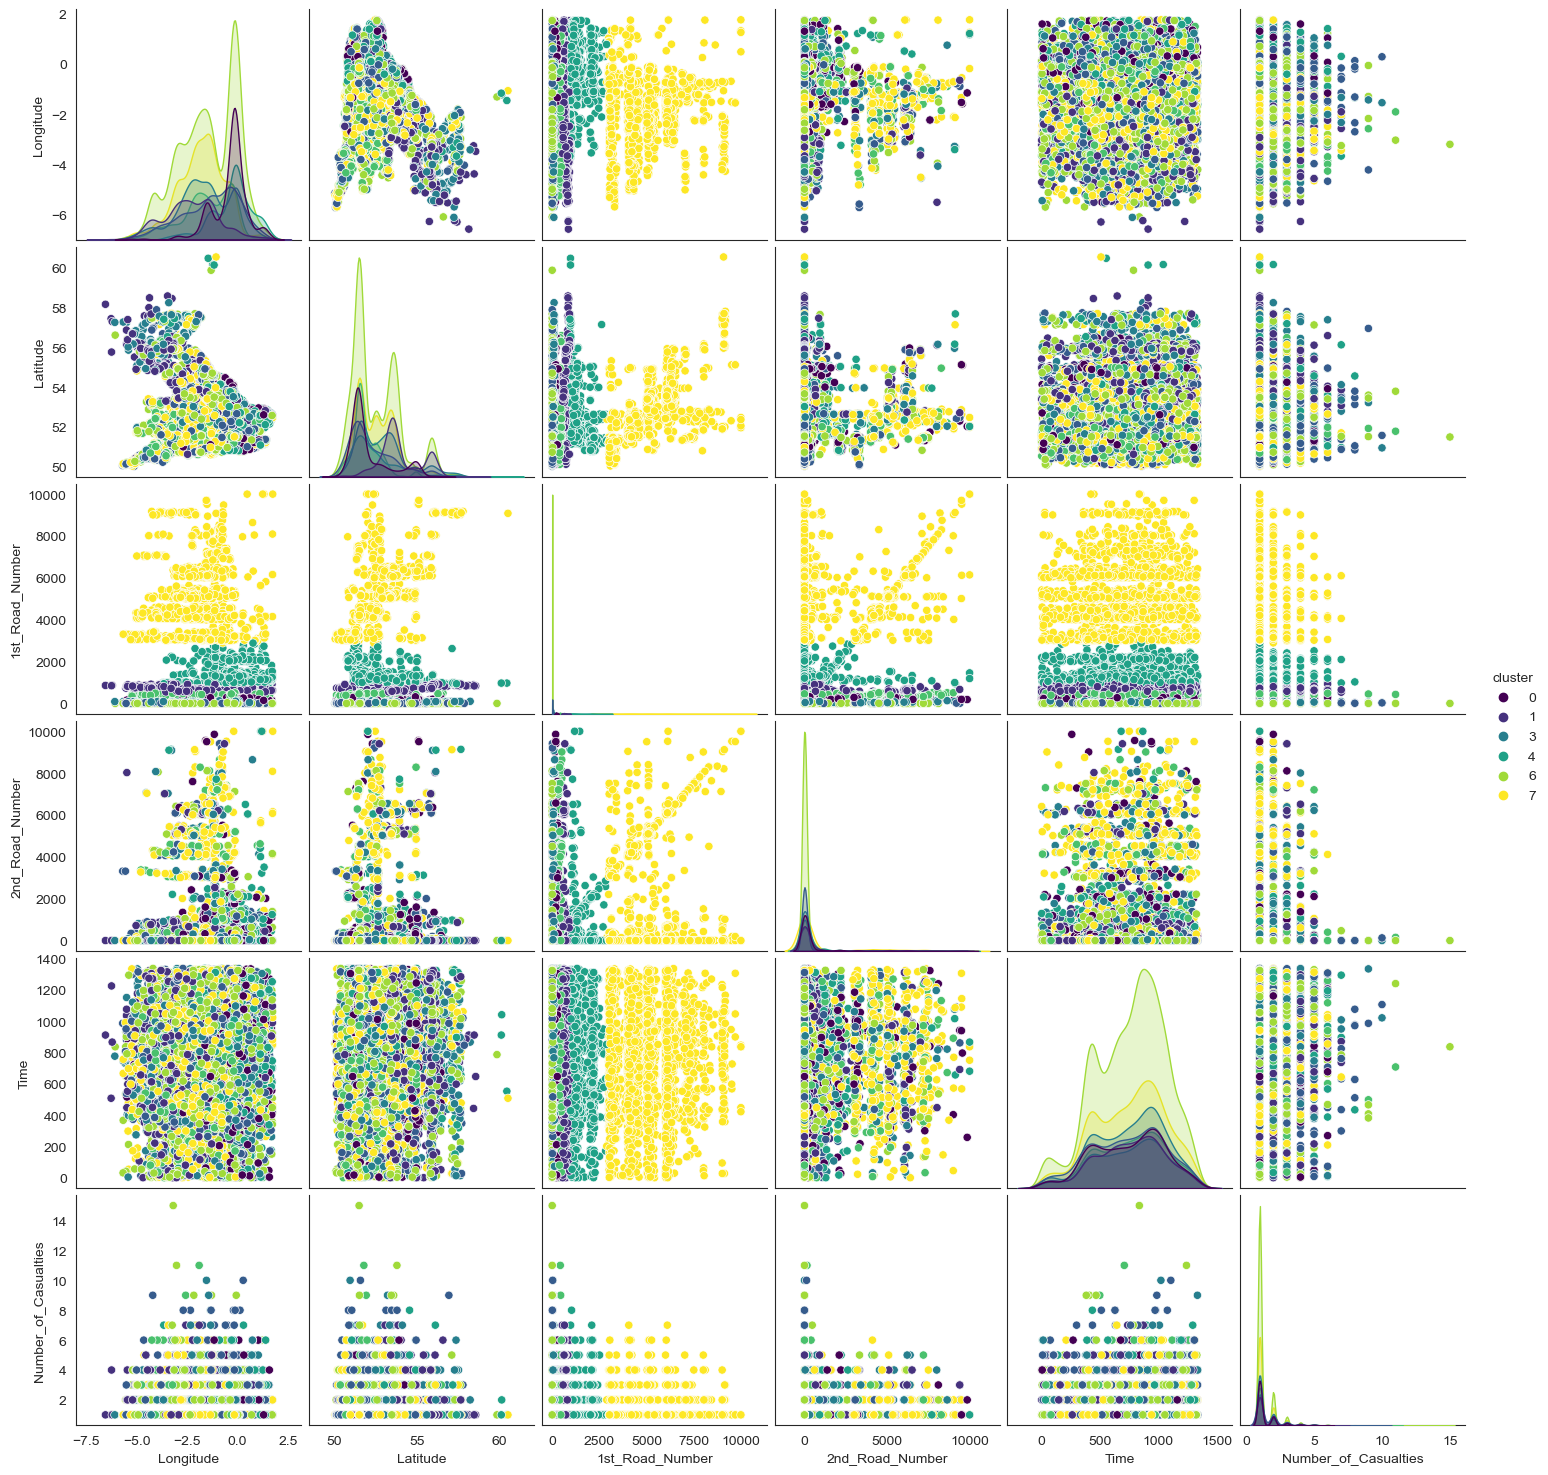

In [57]:
from sklearn_extra.cluster import KMedoids

severity = accident['Accident_Severity']
color_map = {0:'red', 1:'orange', 2:'blue'}
accident['Color'] = accident['Accident_Severity'].map(color_map)

kmedoids = KMedoids(n_clusters=8, random_state=42)
clusters = kmedoids.fit(best_cols_df)

import seaborn as sns

accident['cluster'] = clusters.labels_

selected_features = [
       'Longitude',
       'Latitude',
       '1st_Road_Number',
       '2nd_Road_Number',
       'Time',
       'Number_of_Casualties'
]
sns.pairplot(accident[selected_features + ['cluster']], hue='cluster', palette='viridis')


In [58]:
best_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20253 entries, 1641304 to 1358047
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   1st_Road_Number                          20253 non-null  float64
 1   Day_of_Week                              20253 non-null  int32  
 2   Junction_Control                         20253 non-null  int32  
 3   Light_Conditions                         20253 non-null  int32  
 4   Number_of_Vehicles                       20253 non-null  int64  
 5   Pedestrian_Crossing-Physical_Facilities  20253 non-null  float64
 6   Speed_limit                              20253 non-null  float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 1.0 MB


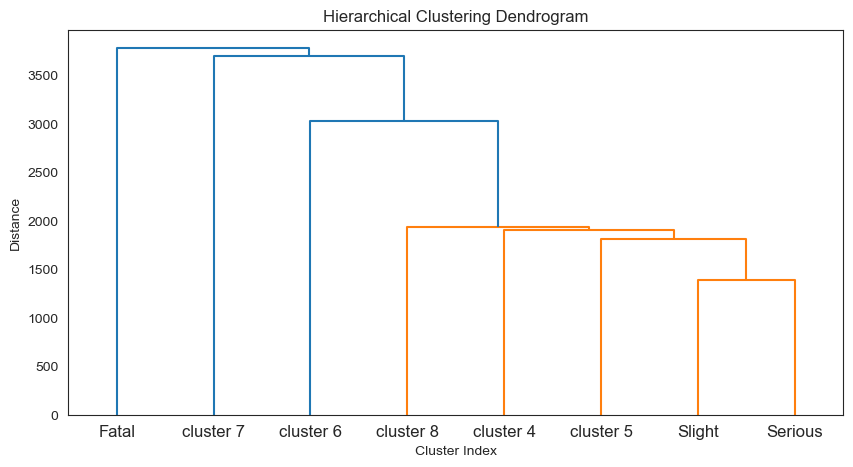

Final cluster labels: [1 1 2 1 1 1 1 1]


In [59]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform k-medoids clustering
k = 8 # Number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=0).fit(best_cols_df)
medoid_indices = kmedoids.medoid_indices_
labels_kmedoids = kmedoids.labels_

# Assign each point to its nearest medoid
def assign_to_nearest_medoid(X, medoids):
    labels = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        distances = np.linalg.norm(medoids - x, axis=1)
        labels[i] = np.argmin(distances)
    return labels

labels = assign_to_nearest_medoid(best_cols_df.values, best_cols_df.values[medoid_indices])

# Form initial clusters for hierarchical clustering
initial_clusters = [best_cols_df.values[labels == i] for i in range(k)]

# Perform hierarchical clustering
initial_medoids = np.array([medoid_indices]).T
Z = linkage(initial_medoids, method='single', metric='euclidean')

# Visualize the dendrogram
plt.figure(figsize=(10, 5))
labels = ['Slight', 'Serious', 'Fatal', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7', 'cluster 8']
dendrogram(Z, labels=labels)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to obtain final clusters
num_clusters = 2  # Choose the number of clusters
final_labels = fcluster(Z, num_clusters, criterion='maxclust')

print("Final cluster labels:", final_labels)